In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv("Loan_Data.csv")

In [65]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [66]:
#define shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [67]:
# basic description of the data
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [68]:
# columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [69]:
# checking for the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
#filling null values
df["LoanAmount"] = df["LoanAmount"].fillna(df.LoanAmount.mean())

In [71]:
df["Credit_History"]= df["Credit_History"].fillna(df.Credit_History.median())

In [72]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.median())

In [73]:
# drop values
df.dropna(inplace=True)

In [74]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
df.shape

(554, 13)

<Axes: >

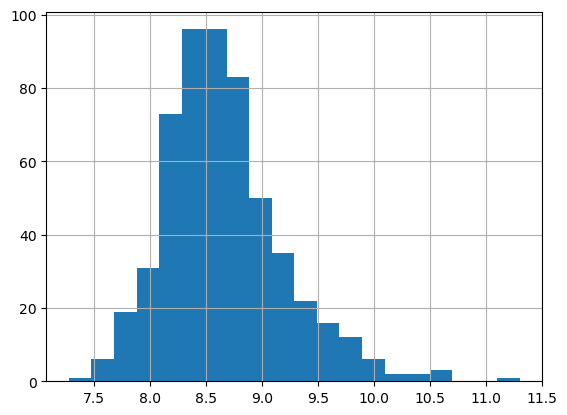

In [76]:
#data visualization
df['Total Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['Total Income_log'] = np.log(df['Total Income'])
df['Total Income_log'].hist(bins = 20)

<Axes: xlabel='Gender', ylabel='LoanAmount'>

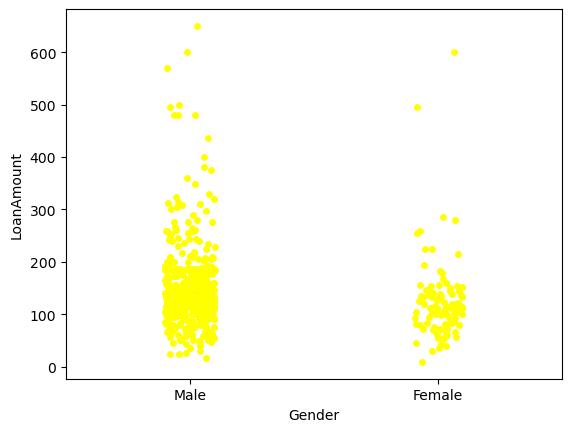

In [77]:
# sctrip plot
sns.stripplot(y="LoanAmount",x="Gender",data=df,color="yellow")

<Axes: xlabel='Education', ylabel='count'>

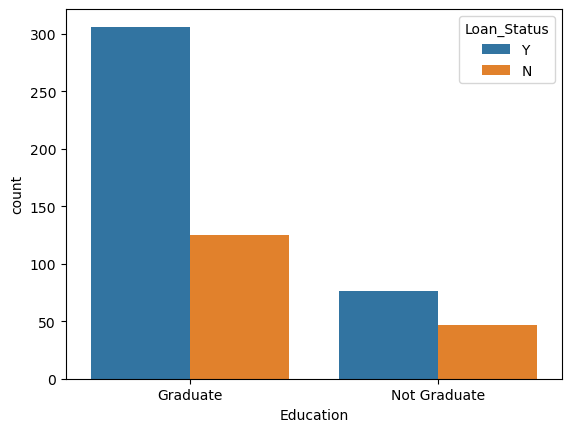

In [78]:

sns.countplot(x="Education",hue="Loan_Status",data=df)

Text(0, 0.5, 'LoanAmount')

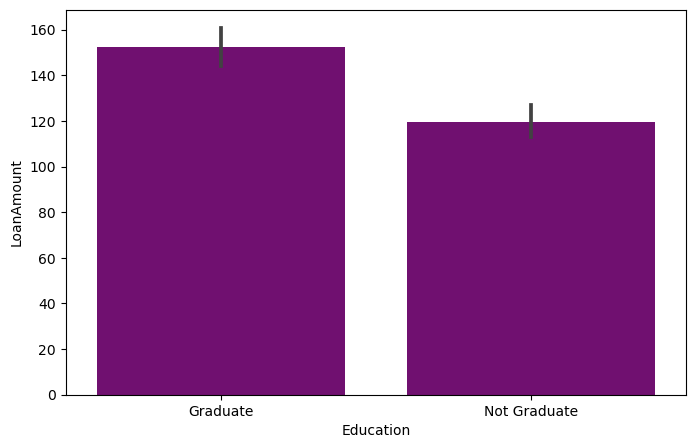

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(y = 'LoanAmount',x = 'Education', data = df,color = 'Purple',)
plt.xlabel('Education')
plt.ylabel('LoanAmount')


In [80]:
# corelation of the data
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total Income,Total Income_log
ApplicantIncome,1.000000,-0.103279,0.510741,0.001427,-0.046793,0.900326,0.717260
CoapplicantIncome,-0.103279,1.000000,0.193454,-0.011450,0.004219,0.339905,0.404511
LoanAmount,0.510741,0.193454,1.000000,0.073608,-0.021309,0.567561,0.665233
Loan_Amount_Term,0.001427,-0.011450,0.073608,1.000000,0.016482,-0.003661,-0.020936
Credit_History,-0.046793,0.004219,-0.021309,0.016482,1.000000,-0.042398,0.004617
Total Income,0.900326,0.339905,0.567561,-0.003661,-0.042398,1.000000,0.855178
Total Income_log,0.717260,0.404511,0.665233,-0.020936,0.004617,0.855178,1.000000


<Axes: >

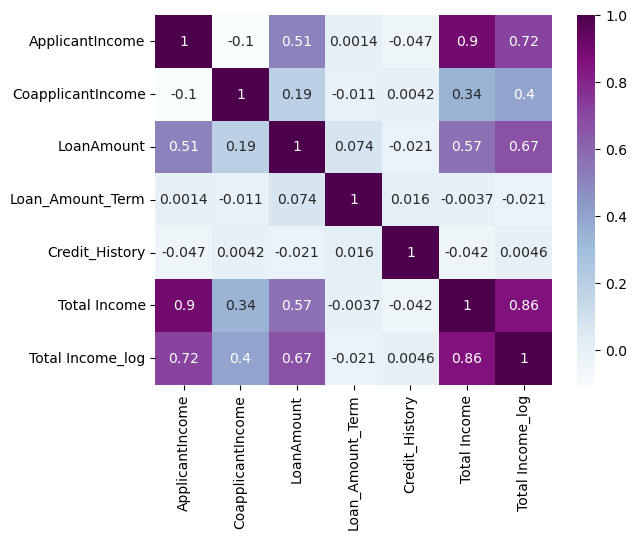

In [81]:
#heatmap
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

In [82]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Total Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,8.933664


In [83]:
#changing objects into int
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le

LabelEncoder()

In [84]:
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [85]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Total Income_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,2900.0,7.972466
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,4106.0,8.320205
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,8312.0,9.025456
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,7583.0,8.933664


In [86]:
x=df.drop(["Loan_ID","Loan_Status","Total Income_log"],axis=1)

In [87]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total Income
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,2900.0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,4106.0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,8312.0
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,7583.0


In [88]:
y=df.Loan_Status

In [89]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 554, dtype: int32

In [90]:
# divinding dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              random_state=42,
                                              test_size=0.3)

In [91]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total Income
31,1,0,0,0,0,3167,0.0,74.000000,360.0,1.0,2,3167.0
516,0,1,2,0,0,2031,1632.0,113.000000,480.0,1.0,1,3663.0
48,0,1,0,0,0,2645,3440.0,120.000000,360.0,0.0,2,6085.0
393,1,1,2,1,0,1993,1625.0,113.000000,180.0,1.0,1,3618.0
210,0,0,0,0,0,10000,0.0,214.000000,360.0,1.0,1,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,1,1,0,1,1000,3022.0,110.000000,360.0,1.0,2,4022.0
118,1,1,0,0,0,5568,2142.0,175.000000,360.0,1.0,0,7710.0
296,1,1,1,0,0,6875,0.0,200.000000,360.0,1.0,1,6875.0
483,1,1,0,0,0,10833,0.0,234.000000,360.0,1.0,1,10833.0


In [92]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [93]:
lr.fit(x_train,y_train)

LogisticRegression()

In [94]:
y_pred = lr.predict(x_test)

In [95]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test,y_pred)

0.8502994011976048

In [99]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc
     

RandomForestClassifier()

In [100]:
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',random_state =7)
rfc = rfc.fit(x_train, y_train)

In [101]:
rfc

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7)

In [102]:
y__pred = rfc.predict(x_test)

In [103]:
y__pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [104]:
accuracy_score(y__pred,y_test)

0.7784431137724551

In [105]:

#Conclusion
#We have predicted the loan status for a given dataset
#The loan status is highly dependent on the Credit History
#This prediction system gives a 85% accuracy
     